In [1]:
# "{'messages': [{'role': 'system', 'content': 'Detect sentiment in the text.'},
#                {'role': 'user', 'content': 'It is a very nice pair of pants. I recommend it to everyone.'},
#                {'role': 'assistant', 'content': 'possitive'}]}"

# system: the instructions you give to the model.
# user: the feature/independent variable/text of each observation in your data (X)
# assistant: the dependent variable/target/label of each observation in your data (y).

In [2]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00


In [3]:
!pip install tiktoken
# tokenları hesaplayıp çıkan masrafı hesaplar.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("/content/sample_data/clothing_reviews.csv")
df.head()

,text,label
0,"I love this shirt! great fabric, nice quality,...",positive
1,I recently purchased this tunic and love it! i...,positive
2,"I love this top, it's design is very pretty an...",positive
3,"Love this sweater! it's really flattering, lon...",positive
4,I wanted to like this so much. it's a great go...,negative


In [ ]:
len(df)

300

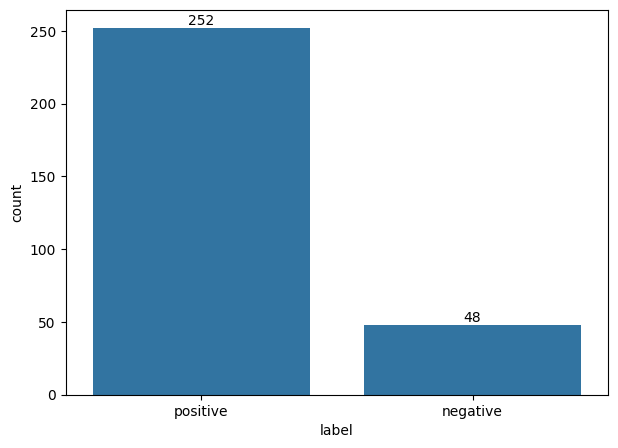

In [7]:
plt.fig = plt.figure(figsize = (7,5))
ax = sns.countplot(x="label",
                   data=df)
ax.bar_label(ax.containers[0]);

In [8]:
df.isnull().sum()

,0
text,0
label,0


In [9]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=101)

In [10]:
print(len(X_train))
print(len(X_test))

225
75


In [11]:
X_train

,text
283,The skirt is comfortable and as pictured. it a...
184,Saw this online and ran over to the store to t...
237,"For me, this top ran true to size. i'm so glad..."
230,"All the colors are beautiful, the white is a t..."
224,"What a fun dress to wear. it feels great, and ..."
...,...
287,I am pleased with this skirt. the jean materia...
43,Love this top! i receive so many compliments w...
88,"Received this dress yesterday, love it!\r\nmy ..."
32,These jeans are very comfortable. the distress...


In [12]:
import json
import pandas as pd

def convert_df_to_dict(X, y):
  """Converts X and y to dictionary format.

  Args:
    X: text
    y: label

  Returns:
    A dataframe(as X and y) in dictionary format.
  """

  dictionary = []
  for i, j in zip(X, y):
    dictionary.append({
        "messages": [
            {
                "role": "system",
                "content": "Detect sentiment in the text." # system content'i tüm gözlemler için aynı olacaktır.
            },
            {
                "role": "user",
                "content": str(i)
            },
            {
                "role": "assistant",
                "content": str(j)
            }
        ]
    })

  return dictionary

# Gözlemleri JSONLine formatına dönüştürmek için öncelikle onları dict formatına dönüştürmemiz gerekiyor.

In [13]:
train = convert_df_to_dict(X_train, y_train)
test = convert_df_to_dict(X_test, y_test)

# Train ve test verilerini ayrı ayrı dictionary formatına dönüştürüyoruz.

In [14]:
train[:2]

[{'messages': [{'role': 'system', 'content': 'Detect sentiment in the text.'},
   {'role': 'user',
    'content': 'The skirt is comfortable and as pictured. it also ran tts. i\'m 5\'5" tall and weigh 140 lbs. i had the medium and didn\'t need to size up to a large. when you put the skirt on a normal body, it looks like you are wearing an easter egg... and not in a good way.'},
   {'role': 'assistant', 'content': 'negative'}]},
 {'messages': [{'role': 'system', 'content': 'Detect sentiment in the text.'},
   {'role': 'user',
    'content': "Saw this online and ran over to the store to try it on. so lovely! i thought i would want it in the cream color but the blue was so lovely in person. it's like a muted blue that makes it so versatile. the detail in the back is gorgeous and so flattering. the safety pin is such a unique touch. it's nice and warm, just not super soft, but not scratchy. i do think i will be extra careful with it because it seems like it could get caught on things easily

In [15]:
X_train[:2]

,text
283,The skirt is comfortable and as pictured. it a...
184,Saw this online and ran over to the store to t...


In [16]:
type(train[0])

dict

In [17]:
import json

with open("train.jsonl", "w") as f:
    for item in train:
        f.write(json.dumps(item) + "\n") # Python'da bir dictionary'i JSON formatına dönüştürmek için json.dumps() fonksiyonu kullanılır.
                                         # Bu fonksiyon dictionary'i bir JSON string'e dönüştürür.

# İnce ayar için modele besleyeceğimiz train ve test datası JSON line formatında olmalıdır. Bunun için dictionary formatındaki tüm gözlemleri
# JSON line formatına dönüştürüyoruz.

# JSON formatı dictionary formatının string'e dönüştürülmesidir.

# dict format: {'name': 'johnson', 'age':44}
# json format: "{'name': 'johnson', 'age':'44'}"

In [18]:
with open("test.jsonl", "w") as f:
    for item in test:
        f.write(json.dumps(item) + "\n")

# Train datasına yaptığımız JSON line dönüşümünün aynısını test datasına da uyguluyoruz.

In [21]:
import json
import codecs

with codecs.open('train.jsonl', 'r', encoding='utf-8') as f:
  a = 0
  for line in f:
    print(type(line))
    print(line)
    a+=1

    if a==2:
      break

# JSON line formatına dönüştürülen tüm gözlemlerin string type'da olduğunu görebiliriz.

<class 'str'>
{"messages": [{"role": "system", "content": "Detect sentiment in the text."}, {"role": "user", "content": "The skirt is comfortable and as pictured. it also ran tts. i'm 5'5\" tall and weigh 140 lbs. i had the medium and didn't need to size up to a large. when you put the skirt on a normal body, it looks like you are wearing an easter egg... and not in a good way."}, {"role": "assistant", "content": "negative"}]}

<class 'str'>
{"messages": [{"role": "system", "content": "Detect sentiment in the text."}, {"role": "user", "content": "Saw this online and ran over to the store to try it on. so lovely! i thought i would want it in the cream color but the blue was so lovely in person. it's like a muted blue that makes it so versatile. the detail in the back is gorgeous and so flattering. the safety pin is such a unique touch. it's nice and warm, just not super soft, but not scratchy. i do think i will be extra careful with it because it seems like it could get caught on things

## Data preparation and analysis for chat model fine-tuning


**Data loading**, **Format validation**, **Token Counting Utilities**, **Data Warnings and Token Counts**, ve **Cost Estimation** bölümleri için aşağıdaki kod blokları OpenAI tarafından hazırlanmıştır. Ve ince ayardan önce kullanılması tavsiye edilir.

Bu kod blokları, bir chatgpt modeline ince ayar yapmak için kullanılan datayı önceden işlemek ve analiz etmek için bir araç görevi görür. Biçim hatalarını kontrol eder, temel istatistikler sağlar ve ince ayar maliyetini belirlemek için gerekli olan token sayılarını tahmin eder.

In [22]:
import json
import tiktoken
import numpy as np
from collections import defaultdict

## Data loading

We first load the chat dataset from an example JSONL file.

In [23]:
data_path = "/content/train.jsonl" # data_path değişkeni jsonl dosyasının yolunu belirtir.

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f: # with open() dosyayı açar ve json.loads() işlevini
                                                  # kullanarak her satırı bir dict nesnesi olarak yükler.

    dataset = [json.loads(line) for line in f] # tüm dict nesnelerini dataset listesine atıyoruz.

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(type(message))
    print(message)

Num examples: 225
First example:
<class 'dict'>
{'role': 'system', 'content': 'Detect sentiment in the text.'}
<class 'dict'>
{'role': 'user', 'content': 'The skirt is comfortable and as pictured. it also ran tts. i\'m 5\'5" tall and weigh 140 lbs. i had the medium and didn\'t need to size up to a large. when you put the skirt on a normal body, it looks like you are wearing an easter egg... and not in a good way.'}
<class 'dict'>
{'role': 'assistant', 'content': 'negative'}


## Format validation

Veri kümesindeki her bir gözlemin ince ayar API'sinin beklediği formata uygun olduğunu doğrulamak için çeşitli hata kontrolleri gerçekleştirebiliriz. Hatalar, daha kolay hata ayıklama için niteliklerine göre kategorize edilir.

1.**Data Type Check(Veri Tipi Kontrolü)**:Veri setindeki her girdinin(input) bir dict olup olmadığını kontrol eder. Error type: data_type.

2.**Presence of Message List(Mesaj Listesinin Varlığı)**: Her girdi için mesaj listesinin olup olmadığını kontrol eder. Error type: missing_messages_list.

3.**Message Keys Check(Mesaj Anahtarları Kontrolü)**: Mesajların içerisindeki "role" ve "content" anahtarlarının varlığını kontrol eder. Error type: message_missing_key.

4.**Unrecognized Keys in Messages(Mesajlardaki Tanınmayan Anahtarlar)**: Bir mesajın "role", "content" ve role_name(system, user, assistant) dışında anahtarları olup olmadığını kontrol eder. Error type: message_unrecognized_key.

5.**Role Validation(role doğrulaması)**: "Role"lerin "system", "user", veya "assistant" olduğunu teyit eder. Error type: unrecognized_role.

6.**Content Validation(content doğrulaması)**: contentin string bir ifade olduğunu teyit eder. Error type: missing_content.

7.**Assistant Message Presence(Asistan Mesajı Varlığı:)**: mesajın içinde assistant'a ait bir içerik olup olmadığını kontrol eder. Error type: example_missing_assistant_message.

Aşağıdaki kod, bu kontrolleri gerçekleştirir ve bulunan her türlü hatanın sayısını yazdırır. Bu, hata ayıklama ve veri kümesinin bir sonraki adımlara hazır olup olmadığını kontrol etme açısından faydalıdır.

In [24]:
# Format error checks
format_errors = defaultdict(int)

for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue

    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue

    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1

        if any(k not in ("role", "content", "name") for k in message):
            format_errors["message_unrecognized_key"] += 1

        if message.get("role", None) not in ("system", "user", "assistant"):
            format_errors["unrecognized_role"] += 1

        content = message.get("content", None)
        if not content or not isinstance(content, str):
            format_errors["missing_content"] += 1

    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

# bu fonksiyon, verilerin ince ayar için hazır olup olmadığını kontrol eder. Eksik veya geçersiz veriler için hata döndürür.
# datada problem yoksa "Hata bulunamadı" mesajını döndürür.

No errors found


## Token Counting Utilities

Lets define a few helpful utilities to be used in the rest of the notebook.

In [25]:
encoding = tiktoken.get_encoding("cl100k_base")

# not exact!
# simplified from https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb
def num_tokens_from_messages(messages, tokens_per_message=3, tokens_per_name=1):
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3
    return num_tokens

def num_assistant_tokens_from_messages(messages):
    num_tokens = 0
    for message in messages:
        if message["role"] == "assistant":
            num_tokens += len(encoding.encode(message["content"]))
    return num_tokens

def print_distribution(values, name):
    print(f"\n#### Distribution of {name}:")
    print(f"min / max: {min(values)}, {max(values)}")
    print(f"mean / median: {np.mean(values)}, {np.median(values)}")
    print(f"p5 / p95: {np.quantile(values, 0.05)}, {np.quantile(values, 0.95)}")

## Data Warnings and Token Counts

Aşağıdaki analizlerle, verilerdeki potansiyel sorunları, eksik mesajları belirleyebilir ve mesaj ve token sayıları hakkında istatistiksel bilgiler sağlayabiliriz.

1.**Missing System/User Messages**: "system" veya "user" mesajı eksik olan gözlemleri sayar. Bu mesajlar, assistant'ın davranışını tanımlamak ve konuşmayı başlatmak için kritik öneme sahiptir.

2.**Number of Messages Per Example**: Her bir gözlemdeki mesaj (system, user, assistant) sayısının dağılımını özetler ve diyalog karmaşıklığı hakkında bilgi sağlar. Her mesajın 3 ayrı bölümü olup olmadığını kontrol eder: system, user, assistant. Öyleyse, her mesajdaki parça sayısının min, max, mean, median, %5 ve %95 dilimlerdeki değeri her zaman 3 olacaktır. Aksi takdirde, bu değerler 3'ten farklı olacaktır.

3.**Total Tokens Per Example**: Her gözlemdeki toplam token sayısının dağılımını hesaplar ve özetler. İnce ayar maliyetlerini anlamak için önemlidir. Bu, system, user ve assistant parçaları da dahil olmak üzere her mesajdaki toplam token sayısı ve dağılımları (mean, median, minimum, maximum, etc.) hakkında bilgi sağlar.

4.**Tokens in Assistant's Messages**: her gözlemdeki assistant mesajlarındaki toekn sayısını hesaplar ve bu dağılımı özetler (mean, median, minimum, maximum, etc.). Assistant hakkında bilgi sağlar.

5.**Token Limit Warnings**:  Herhangi bir gözlem maksimum toekn sınırını (4096 token) aşarsa kontrol eder, çünkü bu tür gözlemler ince ayar sırasında kırpılacak ve bu da veri kaybına neden olacaktır.

In [26]:
n_missing_system = 0
n_missing_user = 0
n_messages = []
convo_lens = []
assistant_message_lens = []

for ex in dataset:
    messages = ex["messages"]
    if not any(message["role"] == "system" for message in messages):
        n_missing_system += 1
    if not any(message["role"] == "user" for message in messages):
        n_missing_user += 1
    n_messages.append(len(messages))
    convo_lens.append(num_tokens_from_messages(messages))
    assistant_message_lens.append(num_assistant_tokens_from_messages(messages))

print("Num examples missing system message:", n_missing_system)
print("Num examples missing user message:", n_missing_user)
print_distribution(n_messages, "num_messages_per_example")
print_distribution(convo_lens, "num_total_tokens_per_example")
print_distribution(assistant_message_lens, "num_assistant_tokens_per_example")
n_too_long = sum(l > 4096 for l in convo_lens)
print(f"\n{n_too_long} examples may be over the 4096 token limit, they will be truncated during fine-tuning")

Num examples missing system message: 0
Num examples missing user message: 0

#### Distribution of num_messages_per_example:
min / max: 3, 3
mean / median: 3.0, 3.0
p5 / p95: 3.0, 3.0

#### Distribution of num_total_tokens_per_example:
min / max: 34, 166
mean / median: 97.36, 94.0
p5 / p95: 45.2, 145.79999999999998

#### Distribution of num_assistant_tokens_per_example:
min / max: 1, 1
mean / median: 1.0, 1.0
p5 / p95: 1.0, 1.0

0 examples may be over the 4096 token limit, they will be truncated during fine-tuning


NOT: Test verileri için Veri yükleme, Format doğrulama, Jeton Sayım Yardımcı Programları, Veri Uyarıları ve Jeton Sayımları bölümlerinin de yapılması gerekir. Not defterini kısa tutmak için bunu sadece eğitim verileri için yaptık.

Ancak maliyet tahmini bölümü yalnızca eğitim verileri için yapılır.

## Cost Estimation

Bu son bölümde, ince ayar için kullanılacak toplam token sayısını tahmin ediyoruz, bu da maliyeti yaklaşık olarak tahmin etmemizi sağlıyor. Token sayısı arttıkça ince ayar işlemlerinin süresinin de artacağını belirtmekte fayda var.

In [27]:
100//30

3

In [28]:
# Pricing and default n_epochs estimate
MAX_TOKENS_PER_EXAMPLE = 4096

TARGET_EPOCHS = 3
MIN_TARGET_EXAMPLES = 100
MAX_TARGET_EXAMPLES = 25000
MIN_DEFAULT_EPOCHS = 1
MAX_DEFAULT_EPOCHS = 25

n_epochs = TARGET_EPOCHS
n_train_examples = len(dataset)
if n_train_examples * TARGET_EPOCHS < MIN_TARGET_EXAMPLES:  # train datasındaki gözlem sayısı ile TARGET_EPOCHS(3) çarpımı MIN_TARGET_EXAMPLES(100)'den küçükse,
    n_epochs = min(MAX_DEFAULT_EPOCHS, MIN_TARGET_EXAMPLES // n_train_examples) # epoch olarak MAX_DEFAULT_EPOCHS(25) veya 100//(train datasındaki gözlem sayısı)'den hangisi küçükse
elif n_train_examples * TARGET_EPOCHS > MAX_TARGET_EXAMPLES: # train datasındaki gözlem sayısı ile TARGET_EPOCHS(3) çarpımı MAX_TARGET_EXAMPLES(25000)'den büyükse,
    n_epochs = max(MIN_DEFAULT_EPOCHS, MAX_TARGET_EXAMPLES // n_train_examples) # epoch olarak MIN_DEFAULT_EPOCHS(1) veya MIN_TARGET_EXAMPLES(25000)//(train datasındaki gözlem sayısı)'den hangisi büyükse

n_billing_tokens_in_dataset = sum(min(MAX_TOKENS_PER_EXAMPLE, length) for length in convo_lens) # bir yorumun token sayısı max 4096'yı geçmeyecek şekilde tüm yorumların toplam token sayısı
print(f"Dataset has ~{n_billing_tokens_in_dataset} tokens that will be charged for during training")
print(f"By default, you'll train for {n_epochs} epochs on this dataset")
print(f"By default, you'll be charged for ~{n_epochs * n_billing_tokens_in_dataset} tokens") # eğitime tabii tutulan toplam token sayısı

current_price=8 # bir milyon token başına fiyat, lütfen güncel fiyat için openai web sayfasını kontrol edin.
print(f"Estimate total costs ~{(n_epochs * n_billing_tokens_in_dataset)/1000000 * current_price}")

# İnce ayar için modele en az 10 gözlem verilmelidir. Aksi takdirde model hata döndürecektir. Ancak ince ayar için modele minimum 100, maksimum 25000
# gözlem verilmesi tavsiye edilir.

# GPT 3.5-Turbo modeli, ince ayar için varsayılan olarak 3 epoch ile çalışır. Ancak bu kod, verilerinizdeki gözlem sayısına göre minimum 1'den maksimum 25'e
# kadar kaç epoch eğitim yapmanız gerektiğini size önerir.

# Tüm eğitim boyunca işlenecek token sayısını ve bu token sayısına göre ince ayar maliyetini döndürür.

# NOT: Bu bölüm yalnızca eğitim verilerine uygulanacaktır.

Dataset has ~21906 tokens that will be charged for during training
By default, you'll train for 3 epochs on this dataset
By default, you'll be charged for ~65718 tokens
Estimate total costs ~0.525744


In [29]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY']=userdata.get('openai_apikey')

In [30]:
from openai import OpenAI

client = OpenAI()
#api_key=os.environ['OPENAI_API_KEY']

In [31]:
training_response = client.files.create(file=open("/content/train.jsonl", "rb"),
                                        purpose="fine-tune") # Train datasını ince ayar için hazırlıyoruz.

training_file_id = training_response.id # Hazır olan train datası için oluşturulan ID’yi çekiyoruz.

validation_response = client.files.create(file=open("/content/test.jsonl", "rb"),
                                          purpose="fine-tune") # Test datasını ince ayar için hazırlıyoruz.

validation_file_id = validation_response.id # Hazır olan test datası için oluşturulan ID’yi çekiyoruz.

print("Training file id:", training_file_id)
print("Validation file id:", validation_file_id)

Training file id: file-YyxwjH4xB7uC4nPR0mtUVWWd
Validation file id: file-8a63FeoYVmK9gQ93VZEYxR4f


In [32]:
suffix_name = "sentiment analys 4"
response = client.fine_tuning.jobs.create(
    training_file=training_file_id, # Train datsının ID'si ince ayar modeline veriliyor. Train datasının ID'si mutlaka sağlanmalıdır
    validation_file=validation_file_id, #Validation datsının ID'si ince ayar modeline veriliyor. Bu kimliği sağlamak isteğe bağlıdır
    model="gpt-3.5-turbo", # şimdilik mevcut tek model GPT-3.5-turbo'dur. GPT-4'ün yakın gelecekte kullanıma sunulmasını bekliyoruz.
    suffix=suffix_name, # İnce ayar yapılan modelin ismine kendi seçeceğimiz bir ek ekleyebiliyoruz ancak modelin ismini tam olarak belirleyemiyoruz.
    hyperparameters={"n_epochs":3}, # Yalnızca Epoch, batchsize ve learning_rate_multiplier parametresini ayarlamamıza izin veriliyor.
                                    # Önerilen epoch sayısı 3 olduğundan epoch'u 3 olarak ayarladık.
)

job_id = response.id # The ID of fine-tune model.

print(response)

FineTuningJob(id='ftjob-mFbElSFDbEeSSIm3e5C4dVtt', created_at=1725963642, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=3, batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-hZ3lJPxH6v2MEFmQ5x5Q9B08', result_files=[], seed=1189402160, status='validating_files', trained_tokens=None, training_file='file-YyxwjH4xB7uC4nPR0mtUVWWd', validation_file='file-8a63FeoYVmK9gQ93VZEYxR4f', estimated_finish=None, integrations=[], user_provided_suffix='sentiment analys 4')


In [33]:
job_id

'ftjob-mFbElSFDbEeSSIm3e5C4dVtt'

In [34]:
#client.fine_tuning.jobs.retrieve(job_id) # status='validating_files', status="running", status = "queued"

In [56]:
client.fine_tuning.jobs.retrieve(job_id) # İnce ayar hakkında genel bilgiler alıyoruz.

FineTuningJob(id='ftjob-mFbElSFDbEeSSIm3e5C4dVtt', created_at=1725963642, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:sentiment-analys-4:A5sf1A0P', finished_at=1725965117, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-hZ3lJPxH6v2MEFmQ5x5Q9B08', result_files=['file-s5vKsTqGEkwVRtOeMtA8ou55'], seed=1189402160, status='succeeded', trained_tokens=64368, training_file='file-YyxwjH4xB7uC4nPR0mtUVWWd', validation_file='file-8a63FeoYVmK9gQ93VZEYxR4f', estimated_finish=None, integrations=[], user_provided_suffix='sentiment analys 4')

In [57]:
client.fine_tuning.jobs.list_events(fine_tuning_job_id=job_id, limit=50) # Son 10 adımdaki ince ayar işleminin olaylarını görüntüler.

SyncCursorPage[FineTuningJobEvent](data=[FineTuningJobEvent(id='ftevent-pDus93bCvff6XsSeGqWVShsp', created_at=1725965123, level='info', message='The job has successfully completed', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-AI8yGrUxpvkJ1KjLs7GQhSQ5', created_at=1725965119, level='info', message='New fine-tuned model created', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-Rqq9ScyAnFfK5qJ8JJWS0nXs', created_at=1725965119, level='info', message='Checkpoint created at step 450', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-Q70FgjMEuF4EypfzaszlGc63', created_at=1725965119, level='info', message='Checkpoint created at step 225', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-zCUPRl3OdxTac33pOOVJnzzS', created_at=1725965103, level='info', message='Step 675/675: training loss=0.00, full validation loss=0.16', object='fin

In [58]:
 response= client.fine_tuning.jobs.list_events(fine_tuning_job_id=job_id)

events=response.data

In [59]:
events.reverse()# İnce ayar işleminin ilk adımları başlangıçta olacak şekilde, reverse() fonksiyonunu kullanarak
                # ince ayar adımlarının sırasını tersine çeviriyoruz.

In [60]:
events

[FineTuningJobEvent(id='ftevent-ehPOiAuSFXcftlK8umrIvIb9', created_at=1725965072, level='info', message='Step 660/675: training loss=0.00, validation loss=0.00', object='fine_tuning.job.event', data={'step': 660, 'train_loss': 6.35782896551973e-07, 'valid_loss': 6.357828776041666e-07, 'total_steps': 675, 'train_mean_token_accuracy': 1.0, 'valid_mean_token_accuracy': 1.0}, type='metrics'),
 FineTuningJobEvent(id='ftevent-3v3ISldmSD9n4fouq9RB7Bmi', created_at=1725965074, level='info', message='Step 661/675: training loss=0.00', object='fine_tuning.job.event', data={'step': 661, 'train_loss': 6.35782896551973e-07, 'total_steps': 675, 'train_mean_token_accuracy': 1.0}, type='metrics'),
 FineTuningJobEvent(id='ftevent-JE74e57Pce1JUTJ0qLp52kGt', created_at=1725965078, level='info', message='Step 662/675: training loss=0.00', object='fine_tuning.job.event', data={'step': 662, 'train_loss': 6.35782896551973e-07, 'total_steps': 675, 'train_mean_token_accuracy': 1.0}, type='metrics'),
 FineTunin

In [61]:
for event in events:
    print(event.message) #

Step 660/675: training loss=0.00, validation loss=0.00
Step 661/675: training loss=0.00
Step 662/675: training loss=0.00
Step 663/675: training loss=0.00
Step 664/675: training loss=0.00
Step 665/675: training loss=0.00
Step 666/675: training loss=0.00
Step 667/675: training loss=0.00
Step 668/675: training loss=0.00
Step 669/675: training loss=0.00
Step 670/675: training loss=0.00, validation loss=0.00
Step 671/675: training loss=0.00
Step 672/675: training loss=0.00
Step 673/675: training loss=0.00
Step 674/675: training loss=0.00
Step 675/675: training loss=0.00, full validation loss=0.16
Checkpoint created at step 225
Checkpoint created at step 450
New fine-tuned model created
The job has successfully completed


In [62]:
#client.fine_tuning.jobs.cancel(job_id)

# You can cancel the fine-tuning process you have started with this code. However, the fine-tuning process will start in 1-2 minutes,
# so you need to cancel it before that. If you don't, you won't be able to cancel it.

In [63]:
import numpy as np
np.exp(-0.14)

0.8693582353988059

In [64]:
np.log(0.8693582353988059)

-0.13999999999999996

## Prediction

In [65]:
client.fine_tuning.jobs.retrieve(job_id) # İnce ayar hakkında genel bilgiler alıyoruz öncelikle. burdan fine-tune model ismini çekeceğiz

FineTuningJob(id='ftjob-mFbElSFDbEeSSIm3e5C4dVtt', created_at=1725963642, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:sentiment-analys-4:A5sf1A0P', finished_at=1725965117, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-hZ3lJPxH6v2MEFmQ5x5Q9B08', result_files=['file-s5vKsTqGEkwVRtOeMtA8ou55'], seed=1189402160, status='succeeded', trained_tokens=64368, training_file='file-YyxwjH4xB7uC4nPR0mtUVWWd', validation_file='file-8a63FeoYVmK9gQ93VZEYxR4f', estimated_finish=None, integrations=[], user_provided_suffix='sentiment analys 4')

In [66]:
model_name= client.fine_tuning.jobs.retrieve(job_id).fine_tuned_model # model ismini çekiyoruz.
model_name

'ft:gpt-3.5-turbo-0125:personal:sentiment-analys-4:A5sf1A0P'

In [67]:
system="Detect sentiment in a text." # Tahmin için kullanacağımız system içeriği, ince ayar için kullandığımız system içeriğiyle aynıdır.

In [68]:
# Test verilerinden birkaç gözlem seçip tahminlerde bulunalım.
display(X_test.loc[139])
display(y_test.loc[139])

'I love this dress! it\'s so comfy and flowy. i wore to an event and got many compliments on the color and design of the dress. i\'m 5\'5" and weigh 150.'

'positive'

In [69]:
completion = client.chat.completions.create(
  model=model_name,
  messages=[
    {"role": "system", "content": system},
    {"role": "user", "content": X_test.loc[139]}
  ]
)

print(completion.choices[0].message.content)

positive


In [70]:
display(X_test.loc[85])
display(y_test.loc[85])

'When i saw this blouse online i thought it looked like a great combination of casual with the elegance of an intricate print. i was so disappointed when it came. the print is not centered in the front or the back. it looks like they were trying to save on the material and just cut it out wherever with no thought to symmetry. for this price the detail of centering the design was expected, especially because this is how it appeared in the picture. loved the blouse, but i will be returning it becau'

'negative'

In [71]:
completion = client.chat.completions.create(
  model=model_name,
  messages=[
    {"role": "system", "content": system},
    {"role": "user", "content": X_test.loc[85]}
  ]
)

print(completion.choices[0].message.content)

negative
